# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Load raster data

In [2]:
# Load red, green and NIR bands

with rasterio.open('E:/Python/Geospatial python/data/B02.tif') as src:
    blue = src.read(1)
    
with rasterio.open('E:/Python/Geospatial python/data/B03.tif') as src:
    green = src.read(1)

with rasterio.open('E:/Python/Geospatial python/data/B04.tif') as src:
    red = src.read(1)
    
with rasterio.open('E:/Python/Geospatial python/data/B08.tif') as src:
    nir = src.read(1)
    
# Get the spatial extent of the raster
left, bottom, right, top = src.bounds

## Indices calculattion

# 1) Normalized Difference Vegetation Index (NDVI)

#### NDVI (Normalized Difference Vegetation Index) is an index widely used in remote sensing to assess and quantify vegetation health and vigor. It is calculated using the reflectance values of near-infrared (NIR) and red light bands of remote sensing imagery, such as satellite or aerial imagery.

#### NDVI is based on the principle that healthy vegetation absorbs most of the visible light (red) for photosynthesis and reflects a large portion of the near-infrared light. Unhealthy or sparse vegetation reflects more visible light and absorbs less near-infrared light.

#### The NDVI formula is as follows:

#### NDVI = (NIR - Red) / (NIR + Red)
#### NIR = Near-infrared band
#### Red = Red band

#### Here, NIR represents the reflectance value in the near-infrared band, and Red represents the reflectance value in the red band.

#### The resulting NDVI values range from -1 to +1. Higher NDVI values (closer to +1) indicate a higher presence of healthy and dense vegetation, while lower values (closer to -1) indicate less vegetation or non-vegetated areas.

#### NDVI can be used to monitor vegetation growth, detect changes in land cover, assess vegetation stress, and study various ecological and agricultural parameters. It is widely employed in applications such as crop monitoring, land management, drought assessment, and forest health analysis in remote sensing studies.

In [3]:
# Calculate NDVI
ndvi = (nir.astype(float) - red.astype(float)) / (nir.astype(float) + red.astype(float))

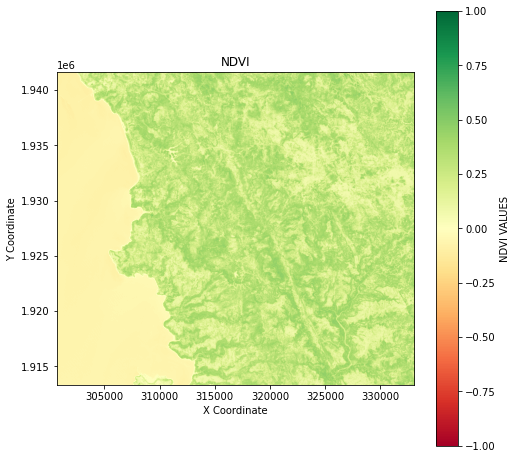

In [4]:
# plot the NDVI
plt.figure(figsize = (8,8))
plt.imshow(ndvi, cmap='RdYlGn', extent=[left, right, bottom, top], vmin=-1, vmax=1)#, aspect='auto')
plt.colorbar(label='NDVI VALUES')
plt.title('NDVI')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.savefig('E:/Python/Geospatial python/data/Output/NDVI.png')
plt.show()

In [5]:
# extract the metadata from raster file
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)#, compress='lzw')

# write tif file
with rasterio.open('E:/Python/Geospatial python/data/Output/ndvi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

# Soil-Adjusted Vegetation Index (SAVI)

#### SAVI (Soil-Adjusted Vegetation Index) is an index similar to NDVI (Normalized Difference Vegetation Index) that is used in remote sensing to evaluate vegetation vigor and health. SAVI takes into account the influence of soil reflectance in the calculation, making it particularly useful in areas with high soil background reflectance or sparse vegetation.

#### The formula for SAVI is as follows:

#### SAVI = ((NIR - Red) / (NIR + Red + L)) * (1 + L)

#### NIR = Near infrared band
#### Red = Red band
#### L = amount of green vegetation cover (Approx = 0.5)

#### In this equation, NIR represents the reflectance value in the near-infrared band, Red represents the reflectance value in the red band, and L is a soil adjustment factor that ranges from 0 to 1. The value of L is determined based on the soil brightness, with higher values used for brighter soils.

#### By including the soil adjustment factor L, SAVI attempts to minimize the influence of soil reflectance and improve the differentiation between dense vegetation and bare soil. This adjustment can be especially valuable in arid and semi-arid regions where the contribution of soil reflectance to the overall reflectance is significant.

#### SAVI values range from -1 to +1, with higher values indicating denser and healthier vegetation and lower values indicating less vegetation or non-vegetated areas. The SAVI index provides a measure of vegetation vigor and can be used for vegetation monitoring, land cover mapping, and ecological assessments in remote sensing applications.

In [6]:
L = 0.5
savi = ((nir.astype(float) - red.astype(float)) / (nir.astype(float) + red.astype(float) + L)) * (1 + L)

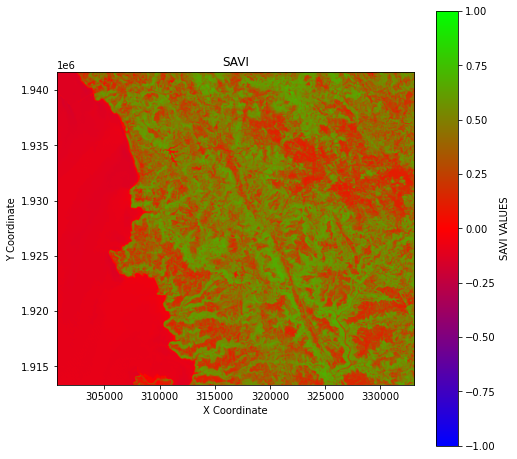

In [7]:
# plot savi index
plt.figure(figsize = (8,8))
plt.imshow(savi, cmap='brg', extent=[left, right, bottom, top], vmin=-1, vmax=1)#, aspect='auto')
plt.colorbar(label='SAVI VALUES')
plt.title('SAVI')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.savefig('E:/Python/Geospatial python/data/Output/SAVI.png')
plt.show()

In [8]:
# extract the metadata from raster file
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1 )#, compress='lzw')

# write tif file
with rasterio.open('E:/Python/Geospatial python/data/Output/savi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, savi.astype(rasterio.float32))

# Normalized Difference water Index (NDWI)

#### NDWI (Normalized Difference Water Index) is an index commonly used in remote sensing to detect the presence of water bodies, such as lakes, rivers, and reservoirs, in satellite or aerial imagery. It leverages the differences in the reflectance of water and other land cover types in the spectral bands of the imagery.

#### The formula for NDWI is as follows:

#### NDWI = (Green - NIR) / (Green + NIR)
#### G = Green band 
#### NIR = Near infrared band

#### In this equation, Green represents the reflectance value in the green band, and NIR represents the reflectance value in the near-infrared band. The choice of bands may vary depending on the specific satellite or sensor used for data acquisition.

#### The resulting NDWI values range from -1 to +1. Higher NDWI values (closer to +1) indicate a higher presence of water, while lower values (closer to -1) represent land or non-water features.

#### NDWI is effective in discriminating water bodies from other land cover types because water absorbs most of the energy in the near-infrared region and reflects energy in the green region. This contrast in reflectance values between water and non-water features allows for the detection and mapping of water bodies.

#### NDWI is widely used in various applications, including hydrological studies, water resource management, flood mapping, and wetland monitoring. It provides valuable information about the spatial extent and dynamics of water bodies in remote sensing analysis.

In [9]:
# Calculate NDWI
ndwi = (green.astype(float) - nir.astype(float)) / (green.astype(float) + nir.astype(float))

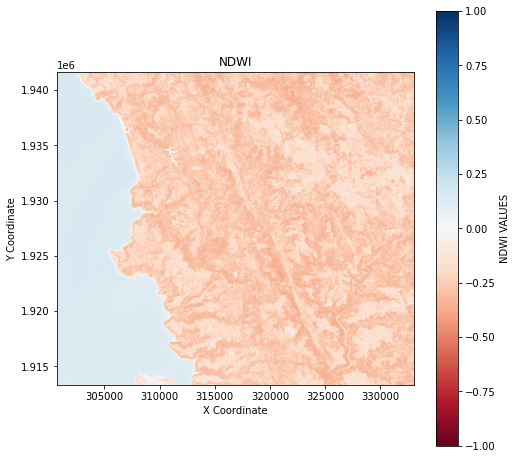

In [10]:
# extract the metadata from raster file
plt.figure(figsize = (8,8))
plt.imshow(ndwi, cmap='RdBu', extent=[left, right, bottom, top], vmin=-1, vmax=1)#, aspect='auto')
plt.colorbar(label='NDWI VALUES')
plt.title('NDWI')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.savefig('E:/Python/Geospatial python/data/Output/ndwi.png')
plt.show()

In [13]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1 )#, compress='lzw')

# write tif file
with rasterio.open('E:/Python/Geospatial python/data/Output/ndwi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndwi.astype(rasterio.float32))
        
# close the file
dst.close()